In [1]:
import os

In [2]:
os.chdir("C:\\Users\\SHAILESH TIWARI\\Python Files\\DataSources")

In [3]:
os.getcwd()

'C:\\Users\\SHAILESH TIWARI\\Python Files\\DataSources'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
dataset = pd.read_csv("airline_passengers.csv")

In [7]:
dataset

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


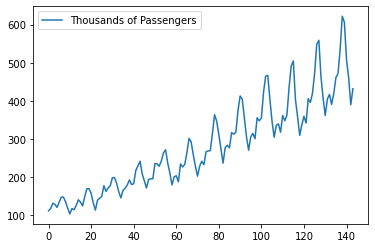

In [8]:
dataset.plot()

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [10]:
dataset['Month'] = pd.to_datetime(dataset['Month'])

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [12]:
dataset.set_index('Month', inplace= True)

In [13]:
dataset

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


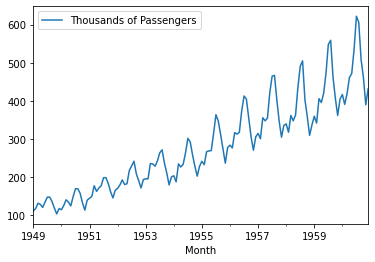

In [14]:
dataset.plot()

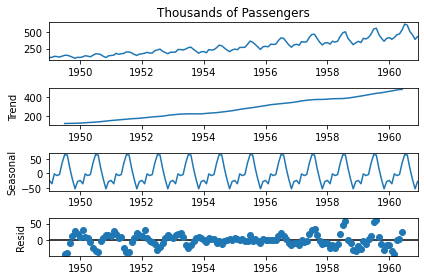

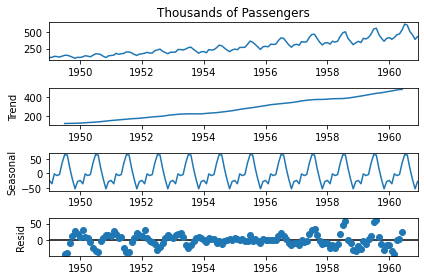

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['Thousands of Passengers'], period=12) #yearly data
decomposition.plot()

In [16]:
from statsmodels.tsa.stattools import adfuller  # to check the stationarity of the data

In [17]:
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060456,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [18]:
def adf_check(time_series):  #fi=unction for beter visual results
    result = adfuller(time_series)
    print("AUGMENTED DICKEY FULLER TEST")
    labels = ['ADF Test Statistic','P-value','#Lags','No of obs']
    for value,label in zip(result,labels):
        print(label + ':' + str(value))
    if result[1]<=0.05:
        print("time series is stationary")
    else:
        print("time series is not stationary")

In [19]:
adf_check(dataset['Thousands of Passengers'])

AUGMENTED DICKEY FULLER TEST
ADF Test Statistic:0.8153688792060456
P-value:0.991880243437641
#Lags:13
No of obs:130
time series is not stationary


In [20]:
dataset['Thousands of Passengers first diff']=dataset['Thousands of Passengers']-dataset['Thousands of Passengers'].shift(1) # taking the difference of the data

In [21]:
dataset

,Thousands of Passengers,Thousands of Passengers first diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [22]:
adf_check(dataset['Thousands of Passengers first diff'].dropna())

AUGMENTED DICKEY FULLER TEST
ADF Test Statistic:-2.8292668241699817
P-value:0.05421329028382789
#Lags:12
No of obs:130
time series is not stationary


In [23]:
dataset['Thousands of Passengers second diff']=dataset['Thousands of Passengers first diff']-dataset['Thousands of Passengers first diff'].shift(1)

In [24]:
dataset

,Thousands of Passengers,Thousands of Passengers first diff,Thousands of Passengers second diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
...,...,...,...
1960-08-01,606,-16.0,-103.0
1960-09-01,508,-98.0,-82.0
1960-10-01,461,-47.0,51.0


In [25]:
adf_check(dataset['Thousands of Passengers second diff'].dropna())

AUGMENTED DICKEY FULLER TEST
ADF Test Statistic:-16.384231542468523
P-value:2.7328918500141235e-29
#Lags:11
No of obs:130
time series is stationary


In [ ]:
#d=2 finding capital P as there is seasonality in data as well

In [26]:
dataset['Seasonal Diff'] = dataset['Thousands of Passengers']-dataset['Thousands of Passengers'].shift(12)


In [27]:
dataset

,Thousands of Passengers,Thousands of Passengers first diff,Thousands of Passengers second diff,Seasonal Diff
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [28]:
dataset.to_csv('file name.csv') # saving the dataset to the csv file

In [29]:
adf_check(dataset['Seasonal Diff'].dropna())

AUGMENTED DICKEY FULLER TEST
ADF Test Statistic:-3.3830207264924796
P-value:0.011551493085515008
#Lags:1
No of obs:130
time series is stationary


In [ ]:
#D=1 for seasonality

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
#plot_pacf(dataset['Thousands of Passengers second diff'].dropna(), lags=14)


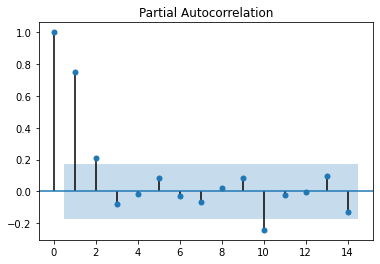

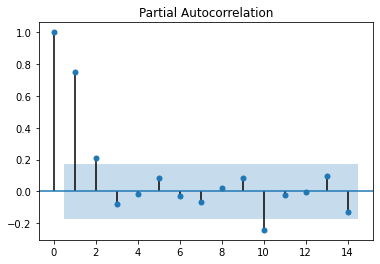

In [31]:
plot_pacf(dataset['Seasonal Diff'].dropna(),lags=14)
#P=1

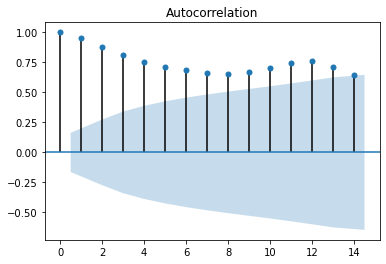

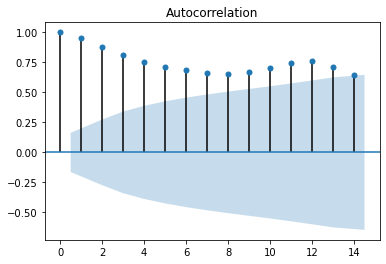

In [32]:
plot_acf(dataset['Thousands of Passengers'].dropna(),lags=14)
#p=1 

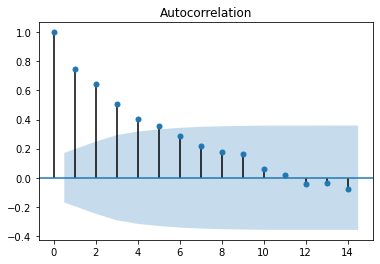

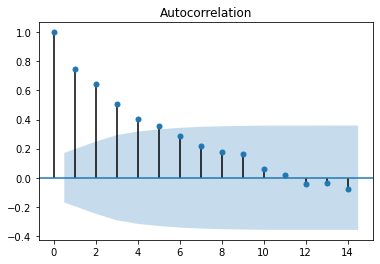

In [33]:
plot_acf(dataset['Seasonal Diff'].dropna(),lags=14)
#Q=2 seasons

In [34]:
# model application
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [35]:
model =sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],order=(0,2,0),seasonal_order=(1,2,2,12))
results = model.fit()
print(results.summary())

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                        SARIMAX Results                                        
Dep. Variable:                 Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(0, 2, 0)x(1, 2, [1, 2], 12)   Log Likelihood                -532.999
Date:                                 Mon, 15 Mar 2021   AIC                           1073.999
Time:                                         14:25:32   BIC                           1085.081
Sample:                                     01-01-1949   HQIC                          1078.499
                                          - 12-01-1960                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.4770      0.588      0.811      0.418      -0.676       1

In [36]:
dataset['Forecast']= results.predict(start=130,end=144,dynamic = True)

In [37]:
len(dataset)

144

In [38]:
dataset

,Thousands of Passengers,Thousands of Passengers first diff,Thousands of Passengers second diff,Seasonal Diff,Forecast
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0,577.855788
1960-09-01,508,-98.0,-82.0,45.0,472.317930
1960-10-01,461,-47.0,51.0,54.0,407.470563


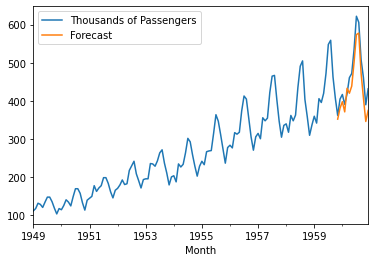

In [39]:
dataset[['Thousands of Passengers','Forecast']].plot()

In [43]:
from pandas.tseries.offsets import DateOffset
future_dates= [dataset.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [44]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=dataset.columns)

In [45]:
future_dates_df

,Thousands of Passengers,Thousands of Passengers first diff,Thousands of Passengers second diff,Seasonal Diff,Forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN,NaN
1961-07-01,NaN,NaN,NaN,NaN,NaN
1961-08-01,NaN,NaN,NaN,NaN,NaN
1961-09-01,NaN,NaN,NaN,NaN,NaN
1961-10-01,NaN,NaN,NaN,NaN,NaN


In [46]:
future_df=pd.concat([dataset,future_dates_df])

In [47]:
future_df

,Thousands of Passengers,Thousands of Passengers first diff,Thousands of Passengers second diff,Seasonal Diff,Forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1962-07-01,NaN,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN,NaN


In [ ]:
#book: business analytics by dinesh kumar

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


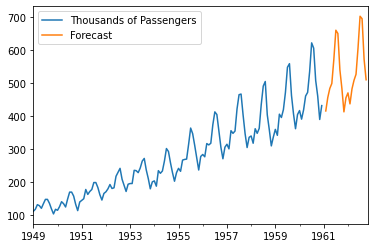

In [48]:
future_df['Forecast']=results.predict(start=145,end=165,dynamic=True)
future_df[['Thousands of Passengers','Forecast']].plot()